26734
13149
Shapiro Test - uminusr : 0.9469648003578186 : p 0.0
uminusr Normal fit : 1.4772883653640747 0.39764779806137085


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


uminusr Johnson fit : -2.172159757920583 2.3157642852233624 0.8115986342758343 0.5612048218966758
uminusr BoxCox lamda 0.27803380484392676 Confidence Intervale (0.24095507886967288, 0.3172620981923554)
Shapiro Test Transdata - uminusr : 0.9818021655082703 : p 2.5132877372946697e-32
uminusr Normal fit : 0.38423919677734375 0.2930980622768402
Need to print normal tests before & after
Shapiro Test - logmstar : 0.9861322045326233 : p 1.0555121652937439e-28
logmstar Normal fit : 9.519022941589355 0.6250671744346619


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/var/folders/cj/z259fmwd41dgzl8mq8nppwd40000gn/T/ipykernel_34876/3135464594.py:77: RuntimeWarning: invalid value encountered in power
  yn1 = xn**lamda-1/lamda
/var/folders/cj/z259fmwd41dgzl8mq8nppwd40000gn/T/ipykernel_34876/3135464594.py:78: RuntimeWarning: invalid value encountered in power
  yn2 = (lamda / xn**lamda-1)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


logmstar Johnson fit : -12.882698419336789 6.151210952249532 5.798315105001898 0.9181006478904624
logmstar BoxCox lamda -1.2754371824361495 Confidence Interval (-1.557996629527812, -0.9888324439521251)
Shapiro Test Transdata - logmstar : 0.9949373006820679 : p 3.0386522815527324e-17
logmstar Normal fit : 0.7394912838935852 0.003676194464787841
Need to print normal tests before & after
Shapiro Test - metal : 0.8996888995170593 : p 0.0
metal Normal fit : 0.011354418471455574 0.003917616792023182


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


metal Johnson fit : -0.717939085259514 1.7386024908214242 0.008845803817661112 0.004966285322260045
metal BoxCox lamda 0.4038057484203871 Confidence Interval (0.37054146826298057, 0.43644617169593286)
Shapiro Test Transdata - metal : 0.9701833128929138 : p 1.7205016428118315e-39
metal Normal fit : -2.0759384632110596 0.05472387373447418
Need to print normal tests before & after


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


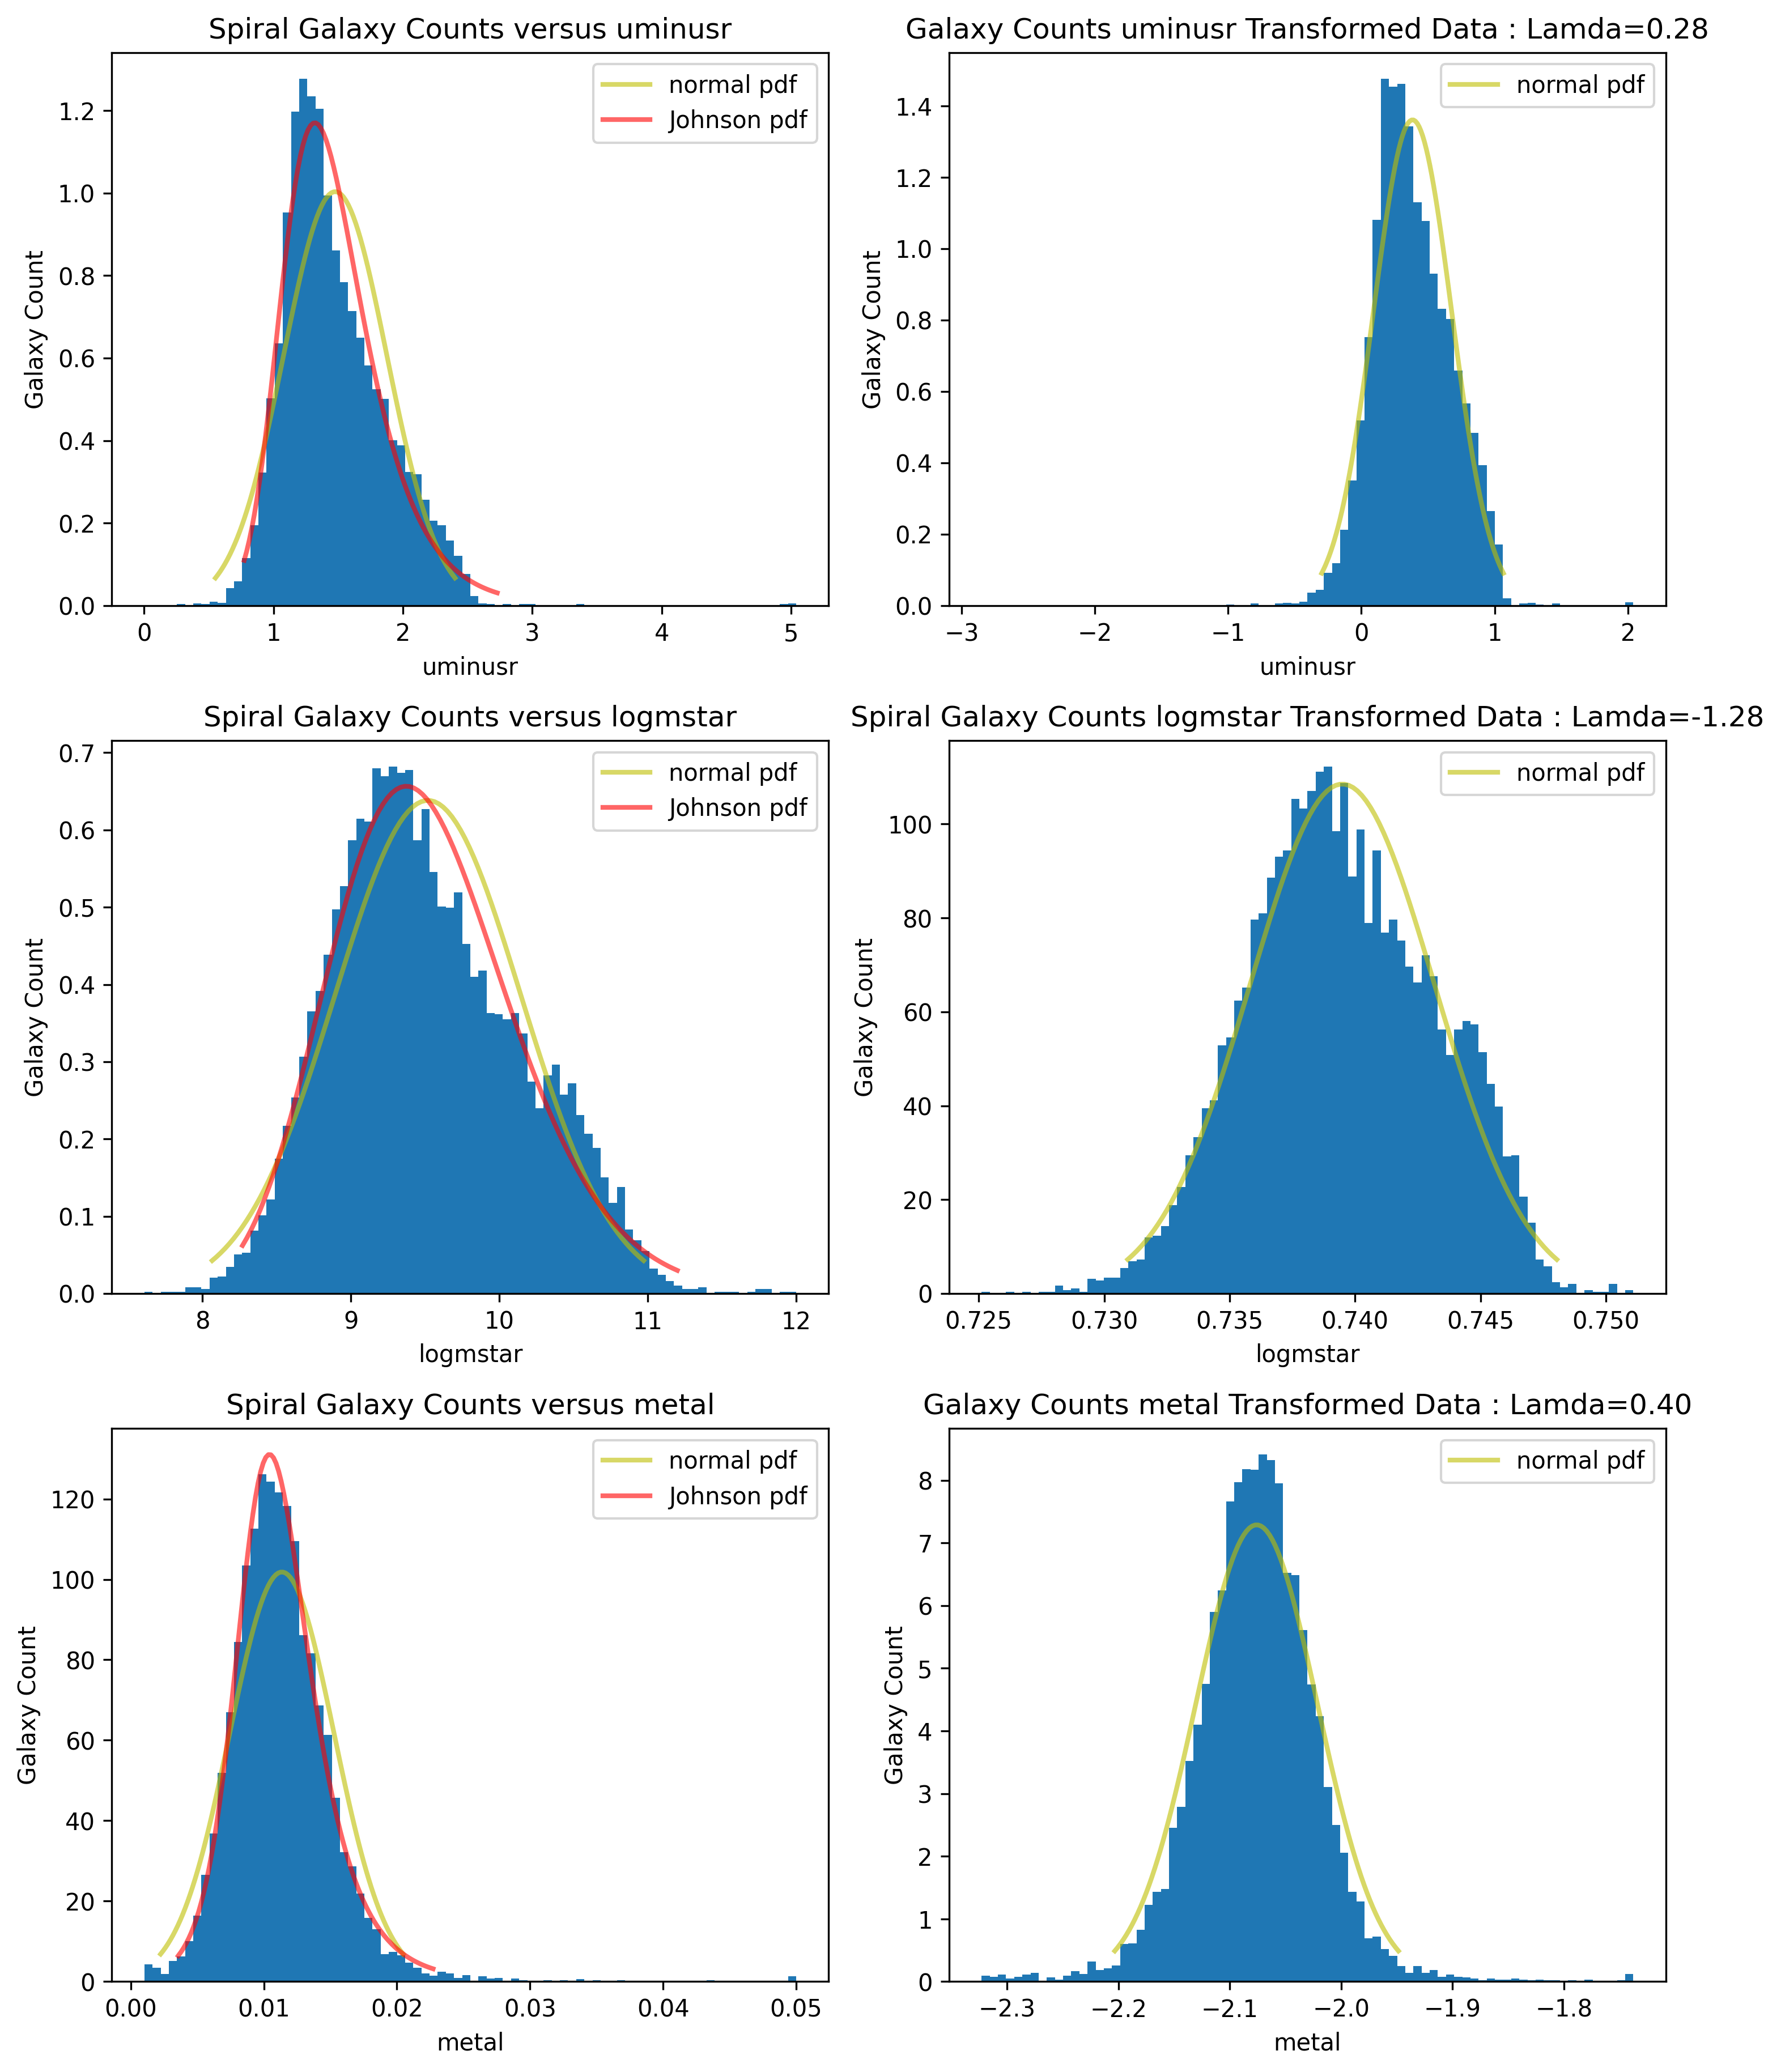

SystemExit: Stop right there!

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from scipy.stats import shapiro


stellarMasses = Table.read('../../GAMA_Data/StellarMassesv19.fits')
# Clean Data
stellarMasses = stellarMasses[stellarMasses['logmstar']> 0]
stellarMasses = stellarMasses[stellarMasses['uminusr']> 0]
stellarMasses = stellarMasses[stellarMasses['metal']> 0]
#print(RawMassEClassEmeasure.colnames)
# CLEAN DATA
RErange = Table.read('../../GAMA_Data/VisualMassClassEnviron.fits')
print(len(RErange))
RErange = RErange[RErange['ELLIPTICAL_CODE'] == 10]
print(len(RErange))
RErange = RErange[RErange['SurfaceDensityFlag'] == 0]
#RErange = RErange[RErange['DistanceTo5nnFlag'] == 0]
#RErange = RErange[RErange['SurfaceDensity'] < 50]
RErange = RErange[RErange['AGEDenParFlag'] == 0]
RErange = RErange[RErange['CountInCylFlag'] == 0]
RErange = RErange[RErange['uminusr']> 0.001]
RErange = RErange[RErange['logmstar']> 0.001]
RErange = RErange[RErange['metal']> 0.001]

binCount = 80
alpha = 1

##### uminusr
fig = plt.figure(figsize=(10, 24), dpi=300)

#fig.suptitle('Plot - Histogram Red Galaxies for Elliptical Galaxies')
#fig.legend(loc="upper right")
#import scipy.stats as stats
from scipy import stats
xfield = 'uminusr'

stat, p = shapiro(RErange[xfield])
print(f"Shapiro Test - {xfield} : {stat} : p {p}")
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#print(counts)
ax1 = fig.add_subplot(6, 2, 1)
ax1.title.set_text('Spiral Galaxy Counts versus '+xfield)
ax1.set_ylabel('Galaxy Count')
ax1.set_xlabel(xfield)
ax1.set_xlabel('uminusr')

# Normal on original
an ,bn =stats.norm.fit(RErange[xfield].data)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)
ax1.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')

# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(RErange[xfield].data)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax1.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax1.hist(RErange[xfield].data, bins=binCount, density=True)
ax1.legend()         

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda, CI = stats.boxcox(RErange[xfield],lmbda=None, alpha = 0.05)
print(f"{xfield} BoxCox lamda {lamda} Confidence Intervale {CI}")
stat, p = shapiro(transdata)
print(f"Shapiro Test Transdata - {xfield} : {stat} : p {p}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)
# y values for CoxBox
yn1 = xn**lamda-1/lamda
yn2 = (lamda / xn**lamda-1)

ax2 = fig.add_subplot(6, 2, 2)
ax2.title.set_text('Galaxy Counts '+xfield+' Transformed Data : Lamda='+'{:.2f}'.format(lamda))
ax2.set_ylabel('Galaxy Count')
ax2.set_xlabel(xfield)
ax2.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
#ax2.plot(xn,yn1,'r', label='Cox Box')
#ax2.plot(xn,yn2,'b', label='Cox Box Inverse')
ax2.hist(transdata, bins=binCount, density=True)
ax2.legend()
print("Need to print normal tests before & after")


xfield ='logmstar'
stat, p = shapiro(RErange[xfield])
print(f"Shapiro Test - {xfield} : {stat} : p {p}")
ax3 = fig.add_subplot(6, 2, 3)
ax3.title.set_text('Spiral Galaxy Counts versus '+xfield)
ax3.set_ylabel('Galaxy Count')
ax3.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

# Normal on original
an ,bn =stats.norm.fit(RErange[xfield].data)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)
ax3.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')


# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(RErange[xfield].data)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax3.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax3.hist(RErange[xfield].data, bins=binCount, density=True)
ax3.legend()

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda, CI = stats.boxcox(RErange[xfield],lmbda=None, alpha = 0.05)
print(f"{xfield} BoxCox lamda {lamda} Confidence Interval {CI}")
stat, p = shapiro(transdata)
print(f"Shapiro Test Transdata - {xfield} : {stat} : p {p}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

ax4 = fig.add_subplot(6, 2, 4)
ax4.title.set_text('Spiral Galaxy Counts '+xfield+' Transformed Data : Lamda='+'{:.2f}'.format(lamda))
ax4.set_ylabel('Galaxy Count')
ax4.set_xlabel(xfield)
ax4.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax4.hist(transdata, bins=binCount, density=True)
print("Need to print normal tests before & after")
ax4.legend()

xfield ='metal'
stat, p = shapiro(RErange[xfield])
print(f"Shapiro Test - {xfield} : {stat} : p {p}")
ax5 = fig.add_subplot(6, 2, 5)
ax5.title.set_text('Spiral Galaxy Counts versus '+xfield)
ax5.set_ylabel('Galaxy Count')
ax5.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

# Normal on original
an ,bn =stats.norm.fit(RErange[xfield].data)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)
ax5.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')


# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(RErange[xfield].data)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax5.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax5.hist(RErange[xfield].data, bins=binCount, density=True)
ax5.legend()

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda, CI = stats.boxcox(RErange[xfield],lmbda=None, alpha = 0.05)
print(f"{xfield} BoxCox lamda {lamda} Confidence Interval {CI}")
stat, p = shapiro(transdata)
print(f"Shapiro Test Transdata - {xfield} : {stat} : p {p}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

ax6 = fig.add_subplot(6, 2, 6)
ax6.title.set_text('Galaxy Counts '+xfield+' Transformed Data : Lamda='+'{:.2f}'.format(lamda))
ax6.set_ylabel('Galaxy Count')
ax6.set_xlabel(xfield)
ax6.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax6.hist(transdata, bins=binCount, density=True)
print("Need to print normal tests before & after")
ax6.legend()
fig.tight_layout()
fig.savefig('../../ChartsPlots/CoxboxSpirals.png', dpi=300, bbox_inches='tight')
plt.show()
plt.show

raise SystemExit("Stop right there!")

fig = plt.figure(figsize=(10, 24), dpi=300)
### ALL Galaxies for Mass

xfield ='uminusr'

ax1 = fig.add_subplot(6, 2, 1)
ax1.title.set_text('All Galaxy Counts versus '+xfield)
ax1.set_ylabel('All Galaxy Count')
ax1.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(stellarMasses[xfield].data)
print(f"All galaxies {xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax1.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax1.hist(stellarMasses[xfield].data, bins=binCount, density=True)
ax1.legend()

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda, CI = stats.boxcox(stellarMasses[xfield],lmbda=None, alpha = 0.05)
print(f"All Galaxies {xfield} BoxCox lamda {lamda} Confidence Interval {CI}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

ax2 = fig.add_subplot(6, 2, 2)
ax2.title.set_text('All Galaxy Counts '+xfield+' Transformed Data : Lamda='+'{:.2f}'.format(lamda))
ax2.set_ylabel('All Galaxy Count')
ax2.set_xlabel(xfield)
ax2.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax2.hist(transdata, bins=binCount, density=True)
print("Need to print normal tests before & after")
ax2.legend()

xfield ='logmstar'

ax3 = fig.add_subplot(6, 2, 3)
ax3.title.set_text('All Galaxies  Counts versus '+xfield)
ax3.set_ylabel('All Galaxy Count')
ax3.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(stellarMasses[xfield].data)
print(f"All galaxies {xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax3.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax3.hist(stellarMasses[xfield].data, bins=binCount, density=True)
ax3.legend()

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda, CI = stats.boxcox(stellarMasses[xfield],lmbda=None, alpha = 0.05)
print(f"All Galaxies {xfield} BoxCox lamda {lamda} Confidence Interval {CI}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

ax4 = fig.add_subplot(6, 2, 4)
ax4.title.set_text('All Galaxy Counts '+xfield+' Transformed Data : Lamda='+'{:.2f}'.format(lamda))
ax4.set_ylabel('All Galaxy Count')
ax4.set_xlabel(xfield)
ax4.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax4.hist(transdata, bins=binCount, density=True)
print("Need to print normal tests before & after")
ax4.legend()

xfield ='metal'

ax5 = fig.add_subplot(6, 2, 5)
ax5.title.set_text('All Galaxies  Counts versus '+xfield)
ax5.set_ylabel('All Galaxy Count')
ax5.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(stellarMasses[xfield].data)
print(f"All galaxies {xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax5.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax5.hist(stellarMasses[xfield].data, bins=binCount, density=True)
ax5.legend()

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda, CI = stats.boxcox(stellarMasses[xfield],lmbda=None,alpha =0.05)
print(f"All Galaxies {xfield} BoxCox lamda {lamda} Confidence Interval {CI}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

ax6 = fig.add_subplot(6, 2, 6)
ax6.title.set_text('Galaxy Counts '+xfield+' Transformed Data : Lamda='+'{:.2f}'.format(lamda))
ax6.set_ylabel('All Galaxy Count')
ax6.set_xlabel(xfield)
ax6.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax6.hist(transdata, bins=binCount, density=True)
print("Need to print normal tests before & after")
ax6.legend()

fig.tight_layout()
#fig.savefig('../../ChartsPlots/CoxboxAllSpiral.png', dpi=300, bbox_inches='tight')
plt.show()


#fig = plt.figure(figsize=(10, 8), dpi=300)
#ax9  = fig.add_subplot(1,1,1)
#ax9.title.set_text('Inverse Cox Box Transforms')
#ax9.set_ylabel('y')
#ax9.set_xlabel('lamda')
#cx = np.linspace(1,10,100)
#cyr = 2.84/((cx**2.84)-1)
#cylm = 2.57/((cx**2.57)-1)
#cym = 0.07/((cx**0.07)-1)
#cye = 10.05*cx**(-2.71828)
#ax9.plot(cx,cyr,'r',lw=alpha,label='uminusr')
#ax9.plot(cx,cylm,'g',lw=alpha,label='logmsatr')
#ax9.plot(cx,cym,'b',lw=alpha,label='metal')
#ax9.plot(cx,cye,'m',lw=alpha,label='expon')
#ax9.legend()
#fig.tight_layout()
#fig.savefig('../../ChartsPlots/SpiralCoxboxInverseTransformsEnvironmentMeasures.png', dpi=300, bbox_inches='tight')
plt.show

#fig = plt.figure(figsize=(10, 8), dpi=300)
#ax9  = fig.add_subplot(1,1,1)
#ax9.title.set_text('Inverse Cox Box Transforms')
#ax9.set_ylabel('y')
#ax9.set_xlabel('lamda')
#cx = np.linspace(1,10,100)
#cyr = 1/((cx**2.84)-1)
#cylm = 1/((cx**2.57)-1)
#cym = 1/((cx**0.07)-1)
#cye = cx**(-2.71828)
#ax9.plot(cx,cyr,'r',lw=alpha,label='uminusr')
#ax9.plot(cx,cylm,'g',lw=alpha,label='logmsatr')
#ax9.plot(cx,cym,'b',lw=alpha,label='metal')
#ax9.plot(cx,cye,'m',lw=alpha,label='expon')
#ax9.legend()

#fig.tight_layout()
#plt.show



